<a href="https://colab.research.google.com/github/SalehOsama/Forecasting_Solar_Renewable_Energy/blob/main/Forecasting_Solar_Renewable_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
time_series = pd.read_csv("time_series_60min_singleindex.csv", usecols=(lambda s:s.startswith('utc') | s.startswith('GB_UKM')), parse_dates=[0], index_col=0)
weather = pd.read_csv("weather_data.csv", parse_dates=[0], index_col=0,usecols=(lambda s:s.startswith('utc') | s.startswith('GB')))

In [3]:
time_series.head()

,GB_UKM_load_actual_entsoe_transparency,GB_UKM_load_forecast_entsoe_transparency,GB_UKM_solar_capacity,GB_UKM_solar_generation_actual,GB_UKM_wind_capacity,GB_UKM_wind_generation_actual,GB_UKM_wind_offshore_capacity,GB_UKM_wind_offshore_generation_actual,GB_UKM_wind_onshore_capacity,GB_UKM_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,
2014-12-31 23:00:00+00:00,NaN,NaN,2664.0,NaN,12212.0,NaN,4040.0,NaN,8173.0,NaN
2015-01-01 00:00:00+00:00,27607.0,NaN,2669.0,NaN,12214.0,NaN,4040.0,NaN,8174.0,385.0
2015-01-01 01:00:00+00:00,27948.0,NaN,2669.0,NaN,12214.0,1148.0,4040.0,117.0,8174.0,1041.0
2015-01-01 02:00:00+00:00,25210.0,NaN,2669.0,NaN,12214.0,1139.0,4040.0,120.0,8174.0,1020.0
2015-01-01 03:00:00+00:00,23693.0,NaN,2669.0,NaN,12214.0,1053.0,4040.0,115.0,8174.0,938.0


In [4]:
# We only need data for 2019
time_series = time_series.loc[time_series.index.year == 2019, :]              # .loc (To select a row with specified condition)

time_series.head()

,GB_UKM_load_actual_entsoe_transparency,GB_UKM_load_forecast_entsoe_transparency,GB_UKM_solar_capacity,GB_UKM_solar_generation_actual,GB_UKM_wind_capacity,GB_UKM_wind_generation_actual,GB_UKM_wind_offshore_capacity,GB_UKM_wind_offshore_generation_actual,GB_UKM_wind_onshore_capacity,GB_UKM_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,
2019-01-01 00:00:00+00:00,27832.0,28145.0,8407.0,0.0,20926.0,9400.0,7905.0,3198.0,13021.0,6202.0
2019-01-01 01:00:00+00:00,27634.0,26859.0,8407.0,0.0,20926.0,9372.0,7905.0,3277.0,13021.0,6095.0
2019-01-01 02:00:00+00:00,25184.0,24991.0,8407.0,0.0,20926.0,8895.0,7905.0,3158.0,13021.0,5737.0
2019-01-01 03:00:00+00:00,22708.0,23395.0,8407.0,0.0,20926.0,8341.0,7905.0,2985.0,13021.0,5357.0
2019-01-01 04:00:00+00:00,21614.0,22568.0,8407.0,0.0,20926.0,7920.0,7905.0,2975.0,13021.0,4945.0


In [5]:
time_series.tail()

,GB_UKM_load_actual_entsoe_transparency,GB_UKM_load_forecast_entsoe_transparency,GB_UKM_solar_capacity,GB_UKM_solar_generation_actual,GB_UKM_wind_capacity,GB_UKM_wind_generation_actual,GB_UKM_wind_offshore_capacity,GB_UKM_wind_offshore_generation_actual,GB_UKM_wind_onshore_capacity,GB_UKM_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,
2019-12-31 19:00:00+00:00,41166.0,36074.0,NaN,0.0,NaN,4966.0,NaN,1843.0,NaN,3122.0
2019-12-31 20:00:00+00:00,38376.0,33518.0,NaN,0.0,NaN,5229.0,NaN,1961.0,NaN,3269.0
2019-12-31 21:00:00+00:00,35579.0,31662.0,NaN,0.0,NaN,5399.0,NaN,1793.0,NaN,3606.0
2019-12-31 22:00:00+00:00,31913.0,29918.0,NaN,0.0,NaN,5865.0,NaN,2082.0,NaN,3783.0
2019-12-31 23:00:00+00:00,31495.0,28200.0,NaN,0.0,NaN,5717.0,NaN,2244.0,NaN,3473.0


In [6]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   GB_UKM_load_actual_entsoe_transparency    8703 non-null   float64
 1   GB_UKM_load_forecast_entsoe_transparency  8640 non-null   float64
 2   GB_UKM_solar_capacity                     8736 non-null   float64
 3   GB_UKM_solar_generation_actual            8760 non-null   float64
 4   GB_UKM_wind_capacity                      8736 non-null   float64
 5   GB_UKM_wind_generation_actual             8724 non-null   float64
 6   GB_UKM_wind_offshore_capacity             8736 non-null   float64
 7   GB_UKM_wind_offshore_generation_actual    8760 non-null   float64
 8   GB_UKM_wind_onshore_capacity              8736 non-null   float64
 9   GB_UKM_wind_onshore_generation_actual     8724 non-null   f

In [7]:
time_series.isna().sum()
#returns the number of missing values (NAN values) in each column.

GB_UKM_load_actual_entsoe_transparency       57
GB_UKM_load_forecast_entsoe_transparency    120
GB_UKM_solar_capacity                        24
GB_UKM_solar_generation_actual                0
GB_UKM_wind_capacity                         24
GB_UKM_wind_generation_actual                36
GB_UKM_wind_offshore_capacity                24
GB_UKM_wind_offshore_generation_actual        0
GB_UKM_wind_onshore_capacity                 24
GB_UKM_wind_onshore_generation_actual        36
dtype: int64

In [8]:
# Dropping unnecessary columns
time_series = time_series.drop(['GB_UKM_solar_capacity', 'GB_UKM_wind_capacity', 'GB_UKM_wind_offshore_capacity', 'GB_UKM_wind_onshore_capacity','GB_UKM_load_actual_entsoe_transparency','GB_UKM_load_forecast_entsoe_transparency','GB_UKM_wind_generation_actual','GB_UKM_wind_offshore_generation_actual','GB_UKM_wind_onshore_generation_actual'], axis = 1)

time_series.head()

,GB_UKM_solar_generation_actual
utc_timestamp,
2019-01-01 00:00:00+00:00,0.0
2019-01-01 01:00:00+00:00,0.0
2019-01-01 02:00:00+00:00,0.0
2019-01-01 03:00:00+00:00,0.0
2019-01-01 04:00:00+00:00,0.0


In [9]:
weather.head()

,GB_temperature,GB_radiation_direct_horizontal,GB_radiation_diffuse_horizontal
utc_timestamp,,,
1980-01-01 00:00:00+00:00,-1.249,0.0,0.0
1980-01-01 01:00:00+00:00,-1.377,0.0,0.0
1980-01-01 02:00:00+00:00,-1.449,0.0,0.0
1980-01-01 03:00:00+00:00,-1.481,0.0,0.0
1980-01-01 04:00:00+00:00,-1.433,0.0,0.0


In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 350640 entries, 1980-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Data columns (total 3 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   GB_temperature                   350640 non-null  float64
 1   GB_radiation_direct_horizontal   350640 non-null  float64
 2   GB_radiation_diffuse_horizontal  350640 non-null  float64
dtypes: float64(3)
memory usage: 10.7 MB


In [11]:
# We only need data for 2019
weather = weather.loc[weather.index.year == 2019]

In [12]:
weather.head()

,GB_temperature,GB_radiation_direct_horizontal,GB_radiation_diffuse_horizontal
utc_timestamp,,,
2019-01-01 00:00:00+00:00,7.088,0.0,0.0
2019-01-01 01:00:00+00:00,6.970,0.0,0.0
2019-01-01 02:00:00+00:00,6.805,0.0,0.0
2019-01-01 03:00:00+00:00,6.723,0.0,0.0
2019-01-01 04:00:00+00:00,6.693,0.0,0.0


In [13]:
weather.tail()

,GB_temperature,GB_radiation_direct_horizontal,GB_radiation_diffuse_horizontal
utc_timestamp,,,
2019-12-31 19:00:00+00:00,5.335,0.0,0.0
2019-12-31 20:00:00+00:00,5.195,0.0,0.0
2019-12-31 21:00:00+00:00,4.956,0.0,0.0
2019-12-31 22:00:00+00:00,4.657,0.0,0.0
2019-12-31 23:00:00+00:00,4.343,0.0,0.0



#**Exploratory Data Analysis (EDA)**

In [14]:
plt.rcParams["figure.figsize"] = (20,6)

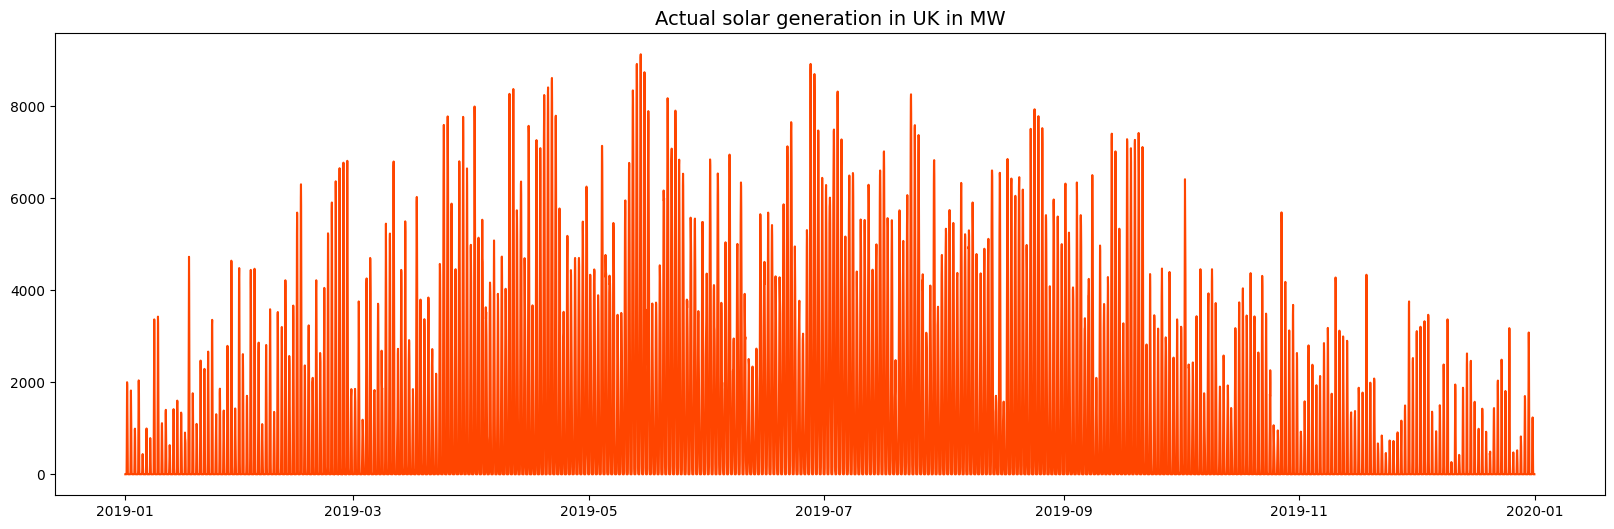

In [15]:
plt.plot(time_series.index, time_series['GB_UKM_solar_generation_actual'], c='OrangeRed')
plt.title("Actual solar generation in UK in MW",fontsize=14)
plt.show()

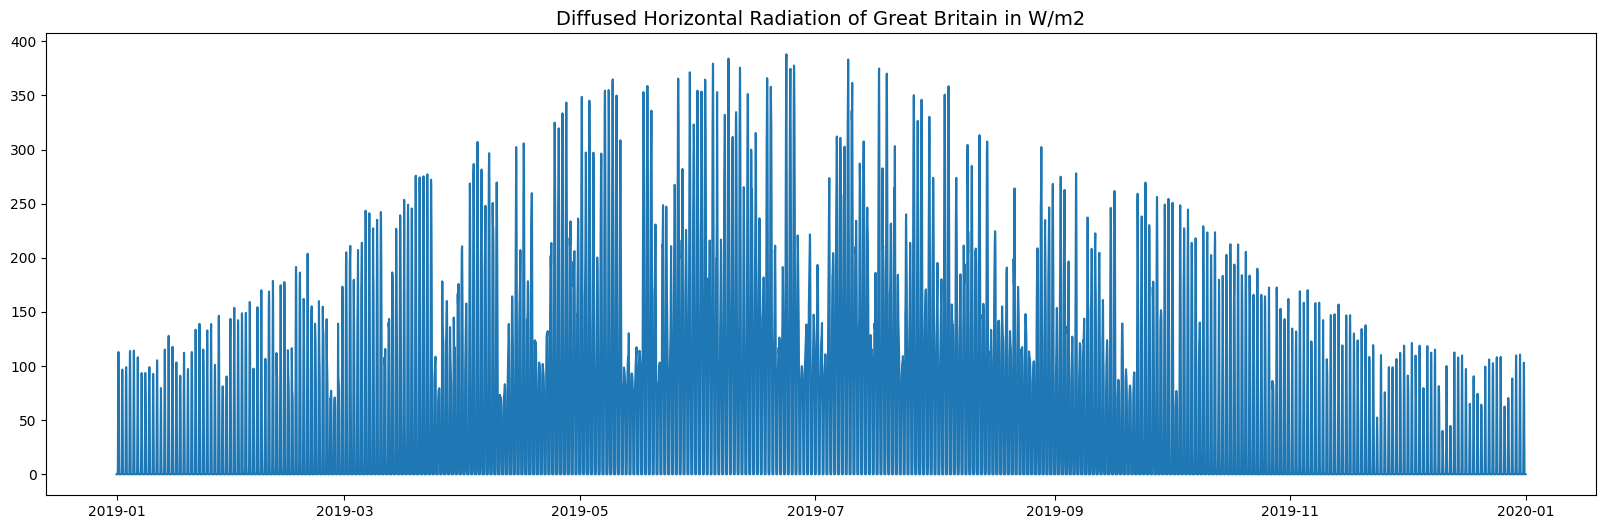

In [16]:
plt.plot(weather.index, weather['GB_radiation_diffuse_horizontal'])
plt.title('Diffused Horizontal Radiation of Great Britain in W/m2',fontsize=14)
plt.show()


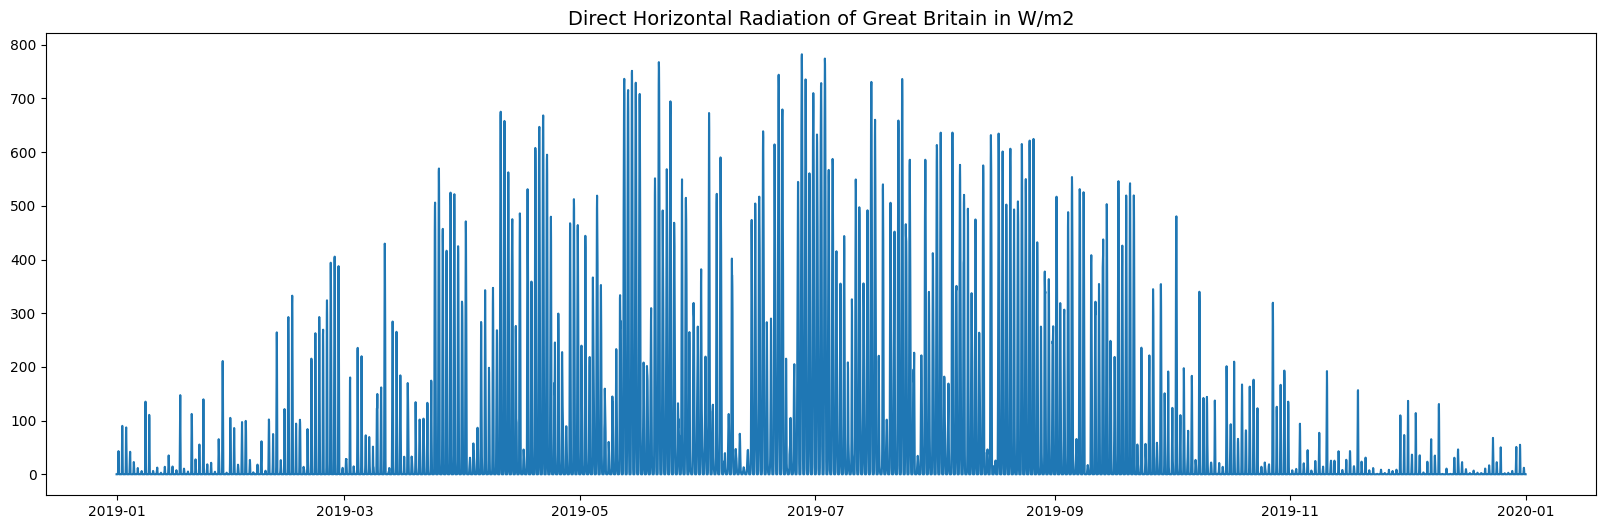

In [17]:
plt.plot(weather.index, weather['GB_radiation_direct_horizontal'])
plt.title('Direct Horizontal Radiation of Great Britain in W/m2',fontsize=14)
plt.show()

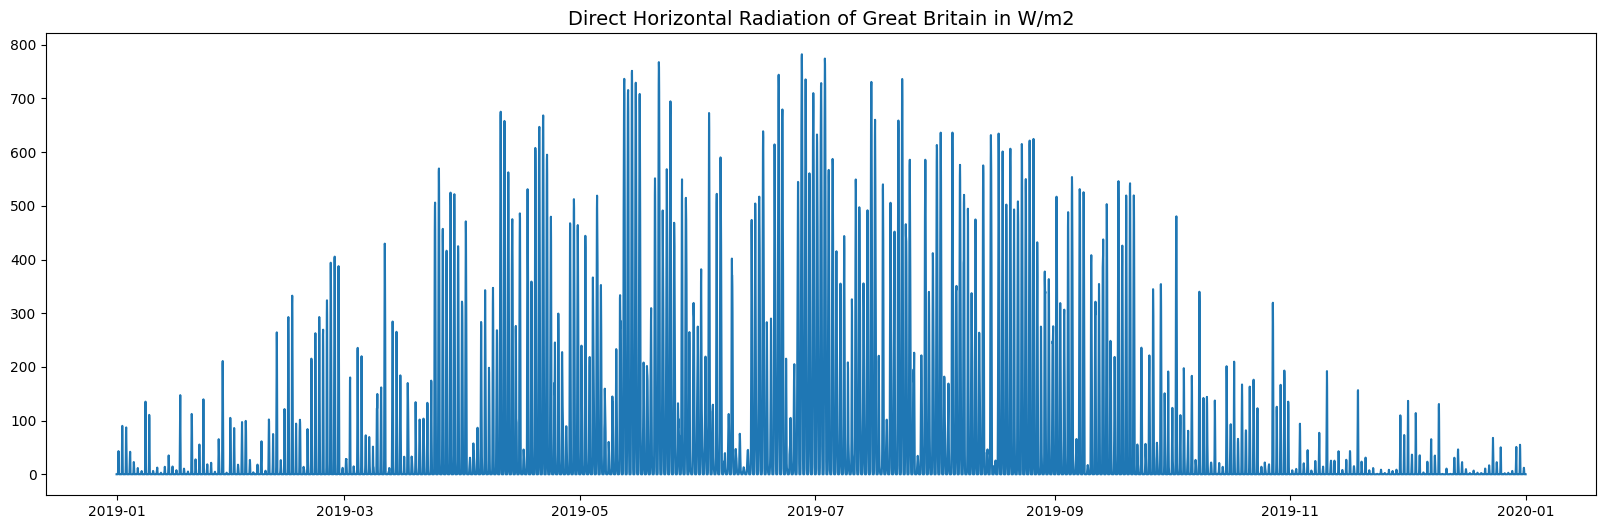

In [18]:
plt.plot(weather.index, weather['GB_radiation_direct_horizontal'])
plt.title('Direct Horizontal Radiation of Great Britain in W/m2',fontsize=14)
plt.show()

**Merging Data Frames**

In [19]:
df = pd.merge(time_series, weather, how='left', left_index=True, right_index=True)
df.head()

,GB_UKM_solar_generation_actual,GB_temperature,GB_radiation_direct_horizontal,GB_radiation_diffuse_horizontal
utc_timestamp,,,,
2019-01-01 00:00:00+00:00,0.0,7.088,0.0,0.0
2019-01-01 01:00:00+00:00,0.0,6.970,0.0,0.0
2019-01-01 02:00:00+00:00,0.0,6.805,0.0,0.0
2019-01-01 03:00:00+00:00,0.0,6.723,0.0,0.0
2019-01-01 04:00:00+00:00,0.0,6.693,0.0,0.0


**Finding correlation between variables**

<Axes: >

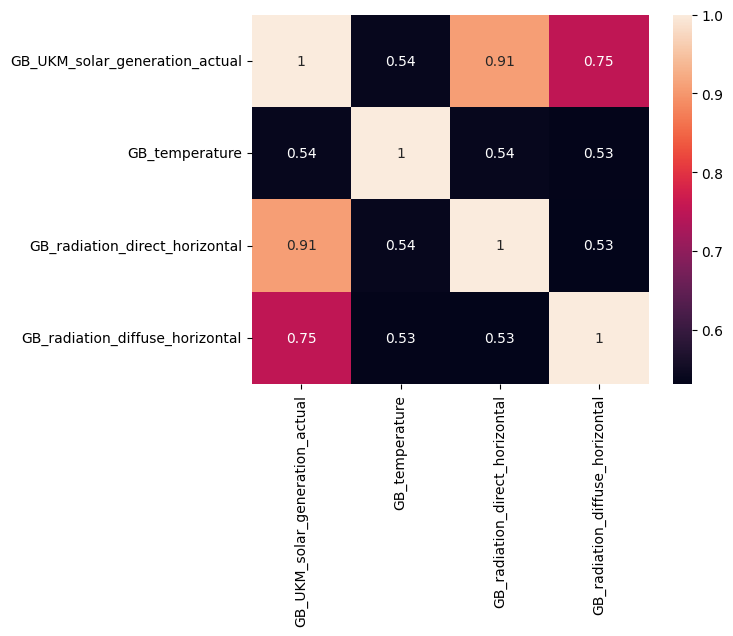

In [20]:
plt.rcdefaults()
sns.heatmap(df.corr(),annot=True)

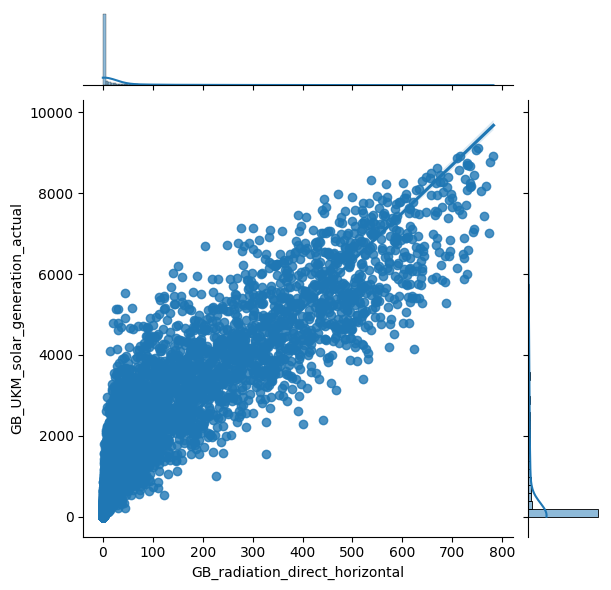

In [21]:
sns.jointplot(x='GB_radiation_direct_horizontal', y= 'GB_UKM_solar_generation_actual', data= df, kind='reg')

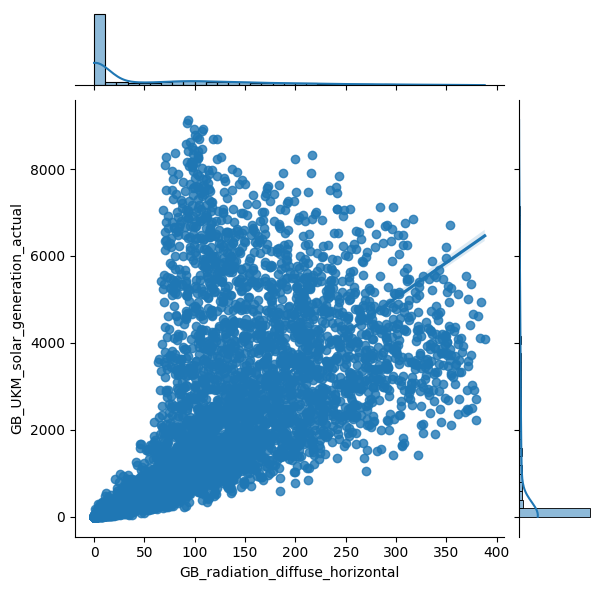

In [22]:
sns.jointplot(x='GB_radiation_diffuse_horizontal', y='GB_UKM_solar_generation_actual', data=df, kind='reg')

# **Fitting a Regression Model**

In [23]:
y = df['GB_UKM_solar_generation_actual']
features = ['GB_radiation_direct_horizontal','GB_radiation_diffuse_horizontal']
X = df[features]

In [24]:
# Importing linear regression from sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)


LinearRegression()

In [25]:
# Checking our predictions
print("Making predictions")
print(X.head())
print("The predictions are")
print(model.predict(X.head()))

Making predictions
                           GB_radiation_direct_horizontal  \
utc_timestamp                                               
2019-01-01 00:00:00+00:00                             0.0   
2019-01-01 01:00:00+00:00                             0.0   
2019-01-01 02:00:00+00:00                             0.0   
2019-01-01 03:00:00+00:00                             0.0   
2019-01-01 04:00:00+00:00                             0.0   

                           GB_radiation_diffuse_horizontal  
utc_timestamp                                               
2019-01-01 00:00:00+00:00                              0.0  
2019-01-01 01:00:00+00:00                              0.0  
2019-01-01 02:00:00+00:00                              0.0  
2019-01-01 03:00:00+00:00                              0.0  
2019-01-01 04:00:00+00:00                              0.0  
The predictions are
[47.17183868 47.17183868 47.17183868 47.17183868 47.17183868]


# **Model Evaluation**

In [26]:
y_predicted = model.predict(X)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
# Calculating R square (square of correlation coefficient)
r2 = r2_score(y, y_predicted)
# Calculating Mean Absolute Error
mae = mean_absolute_error(y,y_predicted)
# Calculating Mean Squared Error (measures goodness of fit)
mse = mean_squared_error(y,y_predicted)
# Calculating Root Mean Squared Error (used more commonly)
rmse = math.sqrt(mse)

In [27]:
# Printing out the metrics
print(r2,mae,rmse)

0.9246564859798216 290.90282381168 529.1138582239013
